In [1]:
%load_ext autoreload
%autoreload 2

import sys
import copy
import math

sys.path.append("../../")

import numpy as np
import torch
import matplotlib.pyplot as plt

import implicitmodules.torch as dm

torch.set_default_tensor_type(torch.FloatTensor)

In [2]:
aabb = dm.Utilities.AABB(-1., 1., -1., 1.)
aabb_draw = dm.Utilities.AABB(-1.5, 1.5, -1.5, 1.5)

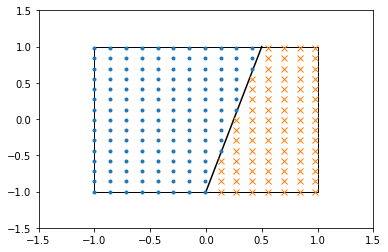

In [4]:
# Demonstration of area_side().
p0 = torch.tensor([0., -1.])
p1 = torch.tensor([0.5, 1.])
points_left = dm.Utilities.fill_area_uniform_density(dm.Utilities.area_side, aabb, 50., p0=p0, p1=p1, intersect=True, side=1)
points_right = dm.Utilities.fill_area_uniform_density(dm.Utilities.area_side, aabb, 50., p0=p0, p1=p1, intersect=True, side=-1)

ax = plt.subplot()
dm.Utilities.plot_aabb(ax, aabb, color='black')
plt.plot((p0[0].item(), p1[0].item()), (p0[1].item(), p1[1].item()), color='black')
plt.axis(aabb_draw.totuple())
plt.plot(points_left.numpy()[:, 0], points_left.numpy()[:, 1], '.')
plt.plot(points_right.numpy()[:, 0], points_right.numpy()[:, 1], 'x')
plt.show()

AttributeError: 'AABB' object has no attribute 'get_list'

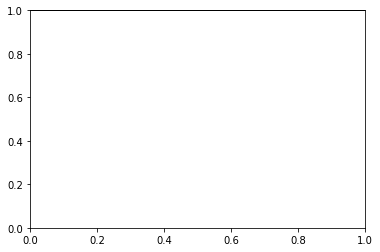

AttributeError: 'AABB' object has no attribute 'get_list'

In [5]:
# Demonstration of extract_convex_hull() and area_convex_shape().
random_points = aabb.fill_random(10)
convex_hull = dm.Utilities.extract_convex_hull(random_points)

points_inside = dm.Utilities.fill_area_uniform_density(dm.Utilities.area_convex_shape, aabb, 40., shape=convex_hull, side=-1)

# With lambda expressions it is easy to invert selection.
points_outside = dm.Utilities.fill_area_uniform_density(lambda x, **kwargs: ~dm.Utilities.area_convex_shape(x, **kwargs), aabb, 40., shape=convex_hull, side=-1)

ax = plt.subplot()
dm.Utilities.plot_aabb(ax, aabb, color='black')
plt.axis(aabb_draw.totuple())
dm.Utilities.plot_polyline(ax, convex_hull, close=True, fill=False)
plt.plot(random_points.numpy()[:, 0], random_points.numpy()[:, 1], 'o')
plt.plot(points_inside.numpy()[:, 0], points_inside.numpy()[:, 1], 'x')
plt.plot(points_outside.numpy()[:, 0], points_outside.numpy()[:, 1], '.')
plt.show()

In [ ]:
# Demonstration of area_shape() - for any kinds of polygons on the plan.
N = 5
shape = aabb.fill_random(N)
shape = dm.Utilities.close_shape(shape)

points_inside = dm.Utilities.fill_area_uniform_density(dm.Utilities.area_shape, aabb, 80., shape=shape)

points_outside = dm.Utilities.fill_area_uniform_density(lambda x, **kwargs: ~dm.Utilities.area_shape(x, **kwargs), aabb, 80., shape=shape)

ax = plt.subplot()
dm.Utilities.plot_aabb(ax, aabb, color='black')
plt.axis(aabb_draw.get_list())
dm.Utilities.plot_polyline(ax, shape, close=False, fill=False)
plt.plot(points_inside.numpy()[:, 0], points_inside.numpy()[:, 1], 'x')
plt.plot(points_outside.numpy()[:, 0], points_outside.numpy()[:, 1], '.')
plt.show()

In [ ]:
# Demonstration of area_polyline_outline() filled by random points using rejection sampling.

N = 5
polyline = aabb.fill_random(N)

points_inside = dm.Utilities.fill_area_random_density(dm.Utilities.area_polyline_outline, aabb, 40., polyline=polyline, width=0.1)

ax = plt.subplot()
dm.Utilities.plot_aabb(ax, aabb, color='black')
plt.axis(aabb_draw.get_list())
dm.Utilities.plot_polyline(ax, polyline, close=False, fill=False)
plt.plot(points_inside.numpy()[:, 0], points_inside.numpy()[:, 1], 'x')
plt.show()

In [ ]:
# Demonstration of a combinaison of area_disc().

N = 4
centers = aabb.fill_random(N)

area_discs = lambda x, **kwargs: sum([dm.Utilities.area_disc(x, radius=kwargs['radius'], center=center) for center in kwargs['centers']]) >= 1

points_inside = dm.Utilities.fill_area_uniform_density(area_discs, aabb, 80., centers=centers, radius=0.4)
points_outside = dm.Utilities.fill_area_uniform_density(lambda x, **kwargs: ~area_discs(x, **kwargs), aabb, 80., centers=centers, radius=0.4)

ax = plt.subplot()
dm.Utilities.plot_aabb(ax, aabb, color='black')
plt.axis(aabb_draw.get_list())
plt.plot(centers.numpy()[:, 0], centers.numpy()[:, 1], 'o')
plt.plot(points_inside.numpy()[:, 0], points_inside.numpy()[:, 1], 'x')
plt.plot(points_outside.numpy()[:, 0], points_outside.numpy()[:, 1], '.')
plt.show()